In [32]:
import numpy as np
from scipy import signal
import scipy.io.wavfile
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('figure', figsize=(10, 3))
import math
from IPython.display import Audio
from IPython.display import display, Markdown

In [33]:
sourceFilesPrefix="SamplesFromPaper//s"
rate1, sample1_data = scipy.io.wavfile.read(sourceFilesPrefix+"1.wav")
rate2, sample2_data = scipy.io.wavfile.read(sourceFilesPrefix+"2.wav")
rate3, sample3_data = scipy.io.wavfile.read(sourceFilesPrefix+"3.wav")
rate4, sample4_data = scipy.io.wavfile.read(sourceFilesPrefix+"4.wav")
rate5, sample5_data = scipy.io.wavfile.read(sourceFilesPrefix+"5.wav")

In [34]:
def sigmoid(y):
    g=np.divide(1,np.add(1,np.exp(-y)))
    return g

def gradient(eta, Y, W):
    delW=np.zeros(W.shape)
    Z=sigmoid(Y)
    Id=np.identity(Y.shape[0])
    grad=eta*(Id+np.dot((1-2*Z),Y.T))*W
    return grad

# First input signal \( vacuum cleaner \)

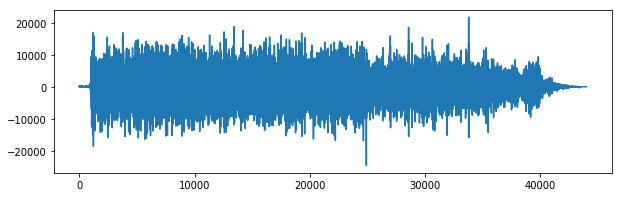

In [35]:
display(Markdown("# First input signal \( vacuum cleaner \)"))
plt.figure(1)
plt.plot(sample2_data)
plt.show()
Audio(data=sample2_data, rate=16000)

# Second input signal \( clapping \)

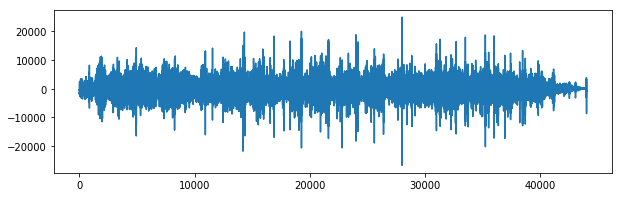

In [36]:
display(Markdown("# Second input signal \( clapping \)"))
plt.figure(1)
plt.plot(sample3_data)
plt.show()
Audio(data=sample3_data, rate=16000)

# Third input signal \( laughter \)

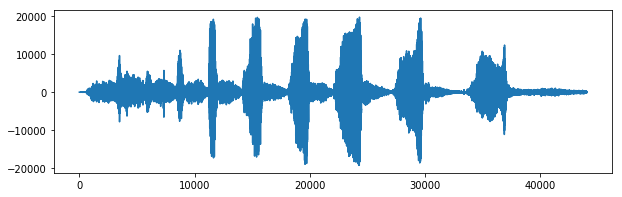

In [37]:
display(Markdown("# Third input signal \( laughter \)"))
plt.figure(1)
plt.plot(sample4_data)
plt.show()
Audio(data=sample4_data, rate=16000)

In [38]:
# Whiten the data
med2=sample2_data.std(axis=0)
s2data=sample2_data/med2
med3=sample3_data.std(axis=0)
s3data=sample3_data/med3
med4=sample4_data.std(axis=0)
s4data=sample4_data/med4

orig=np.matrix([s2data,s3data,s4data])
n=len(orig)
A=np.random.random([n,n])
A=np.matrix([[0.77191,0.47520,0.58699],
             [0.33712,0.47563,0.20836],
             [0.96878,0.57618,0.65625]])
print("Mixing matrix: \n"+str(A))
X=np.dot(A,orig)
print("Correlation matrix: \n"+str(np.corrcoef(X)))

Mixing matrix: 
[[ 0.77191  0.4752   0.58699]
 [ 0.33712  0.47563  0.20836]
 [ 0.96878  0.57618  0.65625]]
Correlation matrix: 
[[ 1.          0.90849405  0.99879514]
 [ 0.90849405  1.          0.91174739]
 [ 0.99879514  0.91174739  1.        ]]


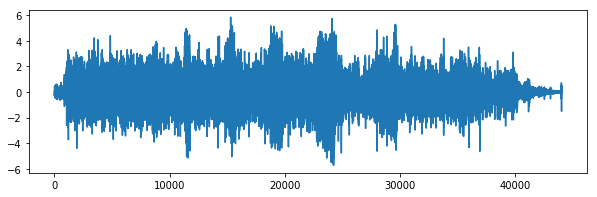

In [39]:
plt.figure(1)
plt.plot(X[0].T)
plt.show()
Audio(data=X[0], rate=16000)

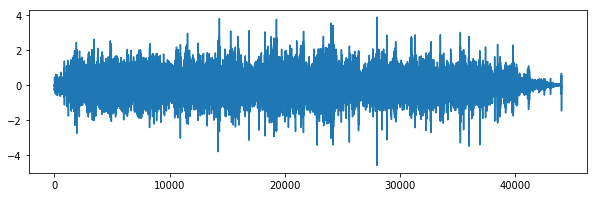

In [40]:
plt.figure(2)
plt.plot(X[1].T)
plt.show()
Audio(data=X[1], rate=16000)

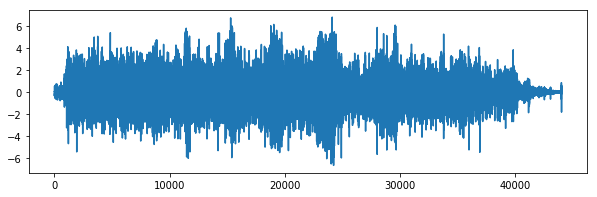

In [41]:
plt.figure(3)
plt.plot(X[2].T)
plt.show()
Audio(data=X[2], rate=16000)

In [42]:
def costFunc(Y,W):
    Z=sigmoid(Y)
    #print(np.dot(Z.T,Z).shape)
    c1=np.dot(Z.T,1-Z)
    c2=np.linalg.det(W)
    C1=np.log(c1)
    C2=np.log(c2)
    return np.sum(C1)

In [43]:
corr12=1
corr13=1
corr23=1
while (abs(corr12)>=3e-6 or abs(corr13)>=3e-6) or abs(corr23)>=3e-6:
    eta=0.01
    eta0=eta
    T=1000
    num_iter=10000

    W=np.random.random([n,n])/100
    print("Initial guessed decomposition matrix: \n"+str(W))
    for i in range(0,num_iter):
        Y=np.dot(W,X)
        delW=gradient(eta,Y,W)
        aux=W+delW
        W=aux
        eta=eta0/(1+(i/T))
    Y2=np.dot(W,X)
    corr=np.corrcoef(Y2)
    print(corr)
    corr12=corr[1][0]
    corr13=corr[2][0]
    corr23=corr[2][1]
print(eta)

Initial guessed decomposition matrix: 
[[ 0.00245435  0.00205452  0.0009413 ]
 [ 0.00244622  0.0014261   0.00535247]
 [ 0.00285715  0.00731687  0.00418296]]
[[  1.00000000e+00   7.16951561e-06   2.92259458e-07]
 [  7.16951561e-06   1.00000000e+00  -2.41775629e-06]
 [  2.92259458e-07  -2.41775629e-06   1.00000000e+00]]
Initial guessed decomposition matrix: 
[[ 0.00929865  0.00224282  0.00276796]
 [ 0.00086809  0.0091701   0.00469689]
 [ 0.00325476  0.00312094  0.00323549]]
[[  1.00000000e+00  -2.08717192e-07  -7.28973282e-06]
 [ -2.08717192e-07   1.00000000e+00  -2.02893193e-06]
 [ -7.28973282e-06  -2.02893193e-06   1.00000000e+00]]
Initial guessed decomposition matrix: 
[[ 0.00345448  0.00754609  0.0061861 ]
 [ 0.0042288   0.00365963  0.00734682]
 [ 0.00392562  0.00461946  0.00705907]]
[[  1.00000000e+00   1.66835161e-06  -1.95525460e-06]
 [  1.66835161e-06   1.00000000e+00  -4.82040497e-06]
 [ -1.95525460e-06  -4.82040497e-06   1.00000000e+00]]
Initial guessed decomposition matrix: 
[

In [44]:
print("Final guessed decomposition matrix: \n"+str(W))

Final guessed decomposition matrix: 
[[-0.07805264 -0.00698921  0.07152597]
 [ 0.10156481 -0.00158836 -0.08022517]
 [-0.00070173  0.02576044 -0.00928074]]


In [45]:
# RECOVERED SIGNALS MATRIX
Y2=np.dot(W,X)
#Y = (Y - Y.min()) / (Y.max() - Y.min());

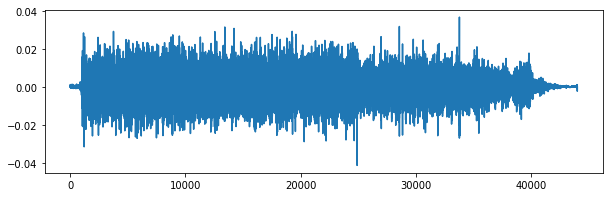

In [46]:
# FIRST RECOVERED SIGNAL
plt.figure(1)
plt.plot(Y2[0].T)
plt.show()
Audio(data=Y2[0], rate=16000)

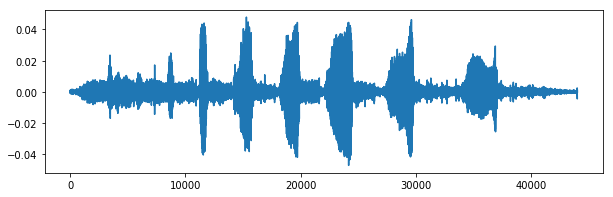

In [47]:
# SECOND RECOVERED SIGNAL
plt.figure(1)
plt.plot(Y2[1].T)
plt.show()
Audio(data=Y2[1], rate=16000)

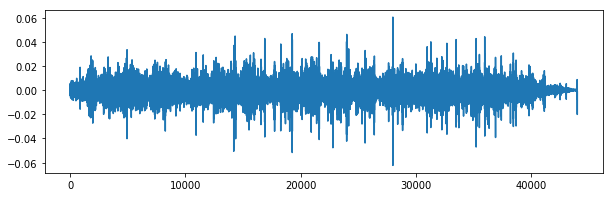

In [48]:
# THIRD RECOVERED SIGNAL
plt.figure(1)
plt.plot(Y2[2].T)
plt.show()
Audio(data=Y2[2], rate=16000)